# Explorative Analyse der Eurovision Song Contest Daten von 2018


Wir erkunden und visualisieren in diesem Notebook das Datenset der Wahlstimmen im Eurovision Song Contest von 2018, dazu nutzen wir das ``networkx`` Paket.

In [1]:
%matplotlib inline
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import sys
import os
from __future__ import division
plt.rcParams["figure.figsize"] = (20,10)
from itertools import chain
import tqdm as tqdm
from colorthief import ColorThief

warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

Wir laden das Datenset von: https://eurovision.tv/story/the-results-eurovision-2018-dive-into-numbers (Leider sind die Daten späterer Jahr nicht in tabellarischen Format verfügbar)

In [2]:
votes_data = pd.read_excel('ESC2018_GF.xlsx',sheetname='Combined result')
print(votes_data.shape)
votes_data.head(5)

(26, 47)


,Rank,Running order,Country,Total,Albania,Austria,Belarus,Belgium,Croatia,Cyprus,...,Hungary,Moldova,Armenia,Czech Republic,Georgia,Montenegro,Azerbaijan,San Marino,Italy,Australia
0,1,22,Israel,529,6,19,8,16,16,10,...,16,22,18,22,15,1,13,24,9,18
1,2,25,Cyprus,436,20,1,15,11,8,0,...,7,13,19,8,10,6,14,7,8,7
2,3,5,Austria,342,2,0,10,15,0,2,...,11,3,7,5,9,0,0,0,7,5
3,4,11,Germany,340,14,16,0,7,3,3,...,1,8,5,3,7,0,5,14,13,12
4,5,26,Italy,308,24,10,4,6,10,15,...,6,8,3,2,5,12,5,12,0,0


In [3]:
votes_data.tail(5)

,Rank,Running order,Country,Total,Albania,Austria,Belarus,Belgium,Croatia,Cyprus,...,Hungary,Moldova,Armenia,Czech Republic,Georgia,Montenegro,Azerbaijan,San Marino,Italy,Australia
21,22,3,Slovenia,64,0,5,4,0,7,0,...,0,0,0,7,0,6,0,6,0,0
22,23,2,Spain,61,0,0,0,1,0,7,...,0,0,0,0,0,0,0,0,0,7
23,24,9,United Kingdom,48,3,0,0,0,2,0,...,0,0,0,0,0,2,0,1,6,6
24,25,17,Finland,46,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,4
25,26,8,Portugal,39,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Die Variable `votes_data` enthält ein dataframe welches in Matrizenform the Anzahl Punkte, die sich Länder gegenseitig gegeben haben, enthält. Um daraus gewichtete gerichtete Kanten zu erstellen nutzen wir die Funktion `melt`, welche die tabellarische Form auffächert in Relationen zwischen Quell und Ziel Land einer Punktezahl.

In [4]:
votes_melted = votes_data.melt(
    ['Rank','Running order','Country','Total'],
    var_name = 'Source Country',value_name='points')

In [5]:
votes_melted.head()

,Rank,Running order,Country,Total,Source Country,points
0,1,22,Israel,529,Albania,6
1,2,25,Cyprus,436,Albania,20
2,3,5,Austria,342,Albania,2
3,4,11,Germany,340,Albania,14
4,5,26,Italy,308,Albania,24


Anhand dieser Kanten in `votes_melted` können wir mittels ``networkx`` einen gerichteten, gewichteten Graphen erstellen:

In [6]:
G = nx.from_pandas_edgelist(votes_melted, 
                            source='Source Country',
                            target='Country',
                            edge_attr='points',
                            create_using=nx.DiGraph())

In [7]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 43
Number of edges: 1118
Average in degree:  26.0000
Average out degree:  26.0000


Eine erste naive Visualisierung bekommen wir indem wir einfach alle Knoten ungeordnet und alle Kanten ungeachtet des Gewichts darstellen:

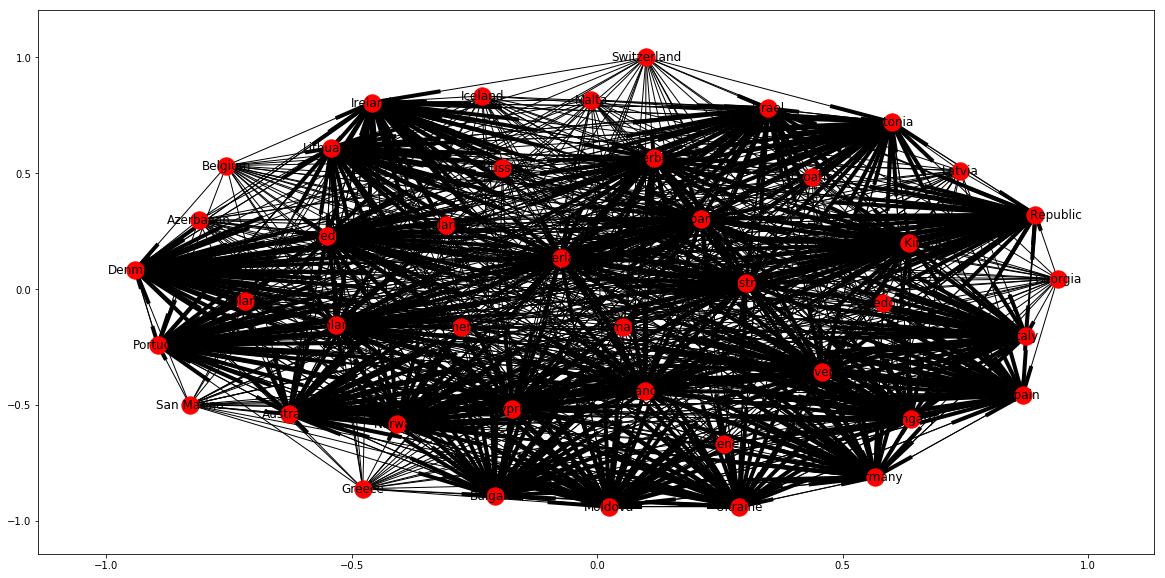

In [8]:
nx.draw_networkx(G)

Jedem Land steht dieselbe Anzahl Punkte zur Verfügung, daher haben alle Knoten denselben Ausgangsgrad.

In [9]:
G.out_degree(weight='points')

OutDegreeView({u'Italy': 116, u'Czech Republic': 116, u'San Marino': 116, u'Malta': 116, u'France': 116, u'Netherlands': 116, u'Ireland': 116, u'Norway': 116, u'Israel': 116, u'Australia': 116, u'Iceland': 116, u'Montenegro': 116, u'Slovenia': 116, u'Germany': 116, u'Armenia': 116, u'Denmark': 116, u'Belgium': 116, u'Spain': 116, u'Ukraine': 116, u'Georgia': 116, u'Lithuania': 116, u'Poland': 116, u'Finland': 116, u'Macedonia': 116, u'Moldova': 116, u'Sweden': 116, u'Belarus': 116, u'Croatia': 116, u'Switzerland': 116, u'Russia': 116, u'Bulgaria': 116, u'Romania': 116, u'Albania': 116, u'Estonia': 116, u'Portugal': 116, u'Serbia': 116, u'Azerbaijan': 116, u'United Kingdom': 116, u'Austria': 116, u'Latvia': 116, u'Greece': 116, u'Hungary': 116, u'Cyprus': 116})

In [10]:
Gsub = G.edge_subgraph([(e[0],e[1]) for e in G.edges(data=True) if e[2]['points']>0])

In [11]:
print nx.info(Gsub)

Name: 
Type: SubDiGraph
Number of nodes: 43
Number of edges: 650
Average in degree:  15.1163
Average out degree:  15.1163


(array([ 16.,   1.,   3.,   2.,   3.,   5.,   4.,   1.,   4.,   4.]),
 array([ 13. ,  17.5,  22. ,  26.5,  31. ,  35.5,  40. ,  44.5,  49. ,
         53.5,  58. ]),
 <a list of 10 Patch objects>)

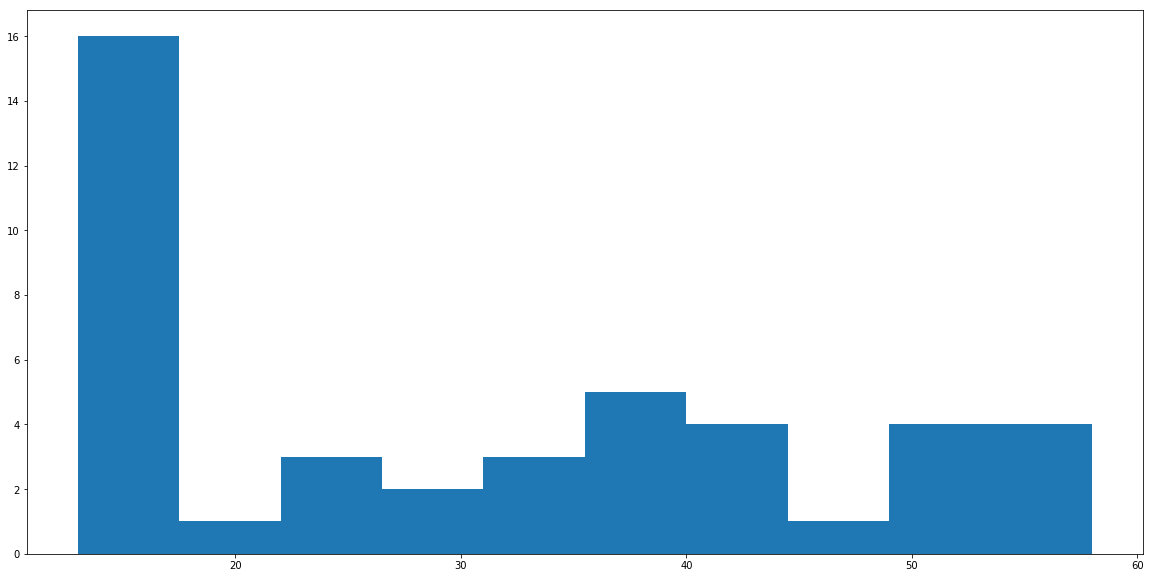

In [12]:
plt.hist(dict(Gsub.degree()).values())

### Ausgangsgrad entscheidet über Sieg:

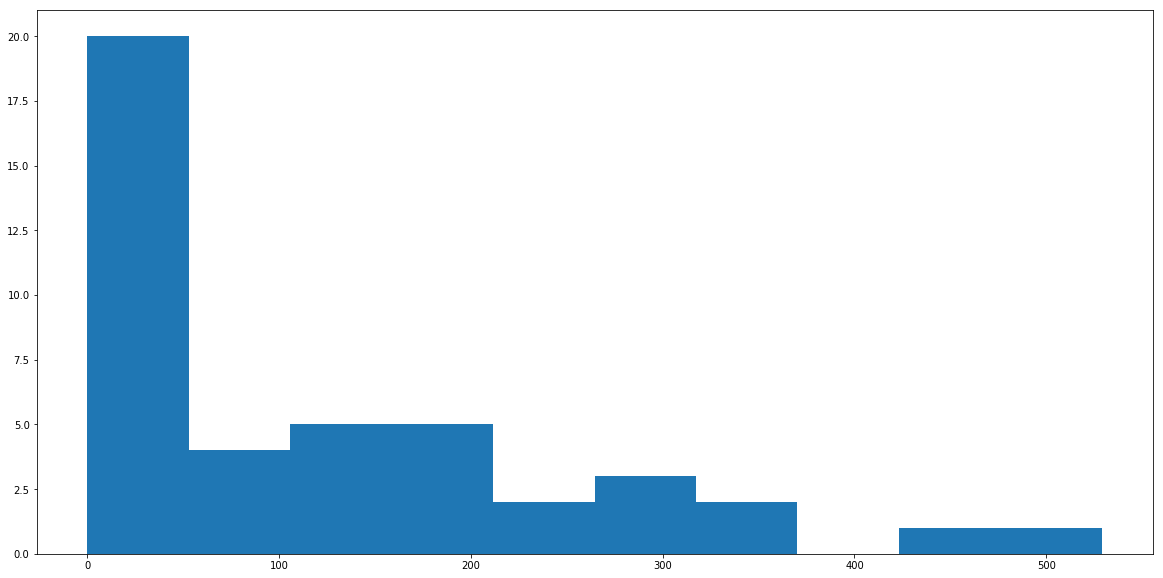

In [13]:
h = plt.hist(dict(G.in_degree(weight='points')).values())

In [14]:
deg_cen_points = dict(G.in_degree(weight='points'))
{k:deg_cen_points[k] for k in deg_cen_points if deg_cen_points[k]==max(deg_cen_points.values())}

{u'Israel': 529}

In [15]:
page_rank = dict(nx.pagerank_numpy(G,weight='points'))
{k:page_rank[k] for k in page_rank if page_rank[k]==max(page_rank.values())}

{u'Israel': 0.09068710831987258}

In [16]:
between = dict(nx.betweenness_centrality(G,weight='points'))
{k:between[k] for k in between if between[k]==max(between.values())}

{u'Slovenia': 2705.4227962405753}

Nun lesen wir Länderinformationen ein um daraus eine `Map` zu erstellen, welche die Geoposition und Länderkürzel enthalten um im Folgenden die Knoten visualisieren und ihnen einen höheren Informationsgehalt zu verleihen.

In [17]:
countries = pd.read_csv('countries.csv',index_col='Country')

In [18]:
countries.head()

,cc2,cc3,numeric,latitude,longitude
Country,,,,,
Afghanistan,AF,AFG,4,33.0000,65.0
Albania,AL,ALB,8,41.0000,20.0
Algeria,DZ,DZA,12,28.0000,3.0
American Samoa,AS,ASM,16,-14.3333,-170.0
Andorra,AD,AND,20,42.5000,1.6


In [19]:
pos_geo = {  node: 
           ( max(-10,min(countries.loc[node]['longitude'],55)), # fixing scale
             max(countries.loc[node]['latitude'],25)) #fixing scale
               for node in G.nodes() }

In [20]:
pos_geo = {}
for node in G.nodes():
    pos_geo[node] = (
                    max(-10,min(countries.loc[node]['longitude'],55)), # fixing scale
                    max(countries.loc[node]['latitude'],25) #fixing scale
    )

In [21]:
flags = {}
flag_color = {}
for node in tqdm.tqdm_notebook(G.nodes()):
    flags[node] = 'flags/'+(countries.loc[node]['cc3']).lower().replace(' ','')+'.png'   
    flag_color[node] =  ColorThief(flags[node]).get_color(quality=1)

A Jupyter Widget

In [22]:
def RGB(red,green,blue): 
    return '#%02x%02x%02x' % (red,green,blue)

Nun zeichnen wir die Knoten anhand der Länderflagge und gewichten ihre Größe mit der Gesamtpunktzahl. Alle Kanten die weniger als ein 0.3 der Gesamtpunktzahl ausmachen werden gefiltert und die Dicke verbleibenden Kanten auch proportional zu ihrem Stimmgewicht dargestellt.

Die relative Position der Länderflaggen korrespondiert zu ihren geographischen Positionen, so werden auch geographische Abhängigkeiten der Punktevergabe und Cluster erkennbar.

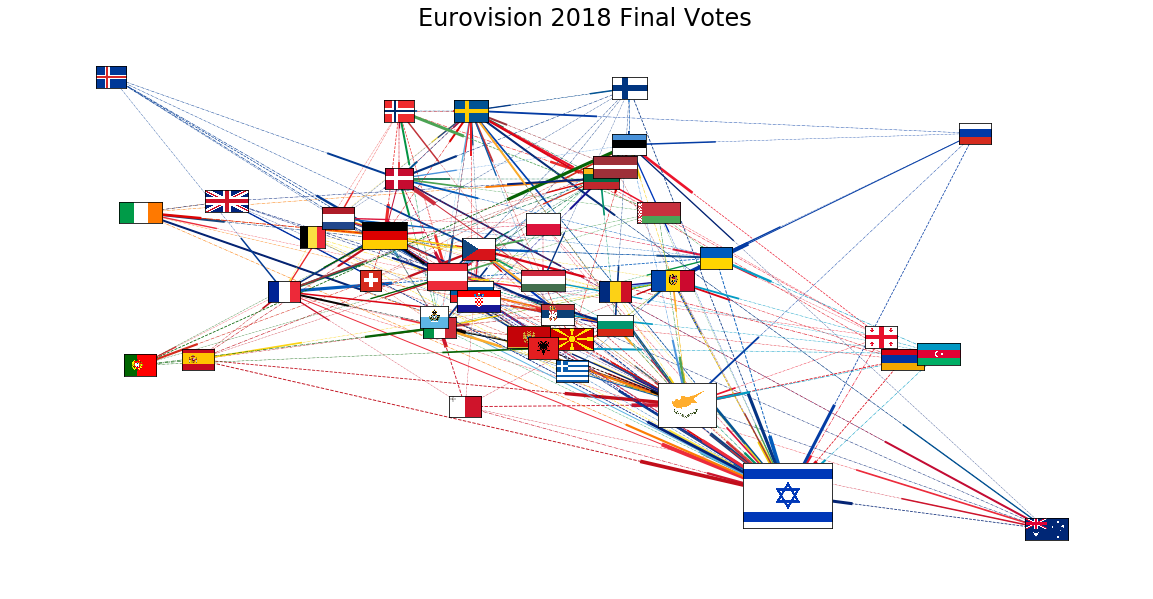

In [23]:
ax=plt.gca()
fig=plt.gcf()
plt.axis('off')
plt.title('Eurovision 2018 Final Votes',fontsize = 24)

trans = ax.transData.transform
trans2 = fig.transFigure.inverted().transform

tick_params = {'top':'off', 'bottom':'off', 'left':'off', 'right':'off',
              'labelleft':'off', 'labelbottom':'off'} #flag grid params

styles = ['dotted','dashdot','dashed','solid'] # line styles

pos = pos_geo
    
# draw edges
for e in G.edges(data=True):
    width = e[2]['points']/24 #normalize by max points
    style=styles[int(width*3)]
    if width>0.3: #filter small votes
        nx.draw_networkx_edges(G,pos,edgelist=[e],width=width, style=style, edge_color = RGB(*flag_color[e[0]]) )
        # in networkx versions >2.1 arrowheads can be adjusted

#draw nodes    
for node in G.nodes():      
    imsize = max((0.3*G.in_degree(node,weight='points')
                  /max(dict(G.in_degree(weight='points')).values()))**2,0.03)
    
    # size is proportional to the votes
    flag = mpl.image.imread(flags[node])
    
    (x,y) = pos[node]
    xx,yy = trans((x,y)) # figure coordinates
    xa,ya = trans2((xx,yy)) # axes coordinates
    
    country = plt.axes([xa-imsize/2.0,ya-imsize/2.0, imsize, imsize ])
    country.imshow(flag)
    country.set_aspect('equal')
    country.tick_params(**tick_params)
    
fig.savefig('images/eurovision2018_map.png')
    

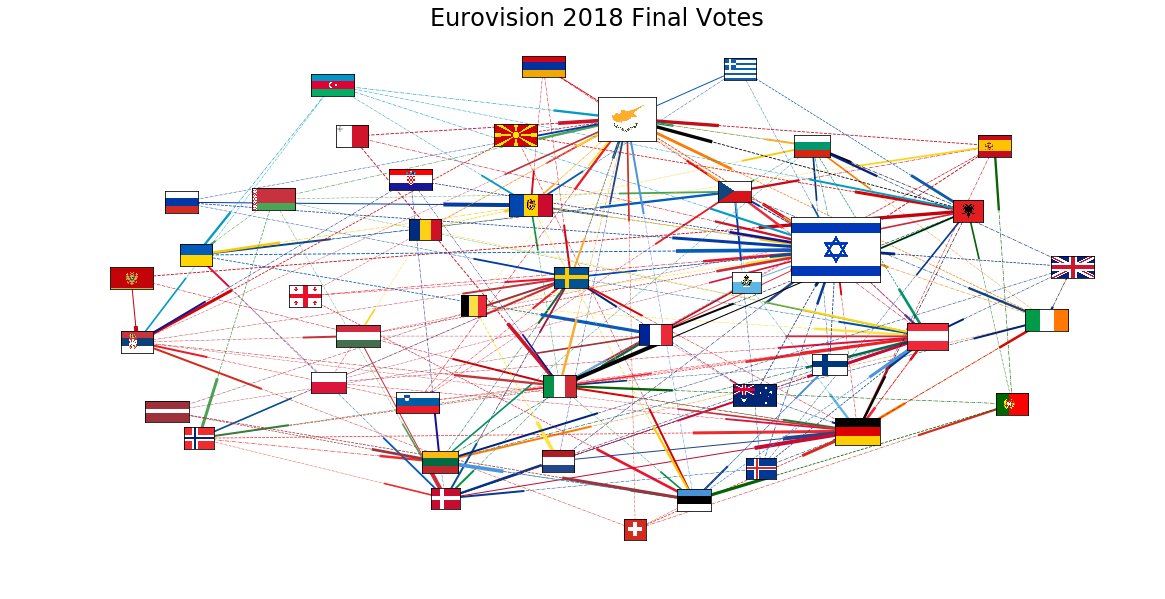

In [24]:
ax=plt.gca()
fig=plt.gcf()
plt.axis('off')
plt.title('Eurovision 2018 Final Votes',fontsize = 24)

pos = nx.layout.fruchterman_reingold_layout(G,k=1,weight = 'points',iterations=1000,scale = 2)

trans = ax.transData.transform
trans2 = fig.transFigure.inverted().transform


tick_params = {'top':'off', 'bottom':'off', 'left':'off', 'right':'off',
              'labelleft':'off', 'labelbottom':'off'} #flag grid params
styles = ['dotted','dashdot','dashed','solid'] # line styles



# draw edges
for e in G.edges(data=True):
    width = e[2]['points']/24 #normalize by max points
    style=styles[int(width*3)]
    if width>0.4: #filter small votes
        nx.draw_networkx_edges(G,pos,edgelist=[e],width=width, 
                               style=style, edge_color = RGB(*flag_color[e[0]]) )
        # in networkx versions >2.1 arrowheads can be adjusted

#draw nodes    
for node in G.nodes():    
    imsize = max((0.3*G.in_degree(node,weight='points')/max(dict(G.in_degree(weight='points')).values()))**2,0.03)
    # size is proportional to the votes
    flag = mpl.image.imread(flags[node])
    
    (x,y) = pos[node]
    xx,yy = trans((x,y)) # figure coordinates
    xa,ya = trans2((xx,yy)) # axes coordinates
    
    country = plt.axes([xa-imsize/2.0,ya-imsize/2.0, imsize, imsize ])
    country.imshow(flag)
    country.set_aspect('equal')
    country.tick_params(**tick_params)
    
fig.savefig('images/eurovision2018_spring.png')
    